In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Replace with the correct path to your file on the D drive
#file_path = "E:\Semester 7\Stream Processing\archive\SAML-D.csv"

# Load the file into a Pandas DataFrame and print it
data = pd.read_csv(r"C:\\Users\\Arabtech\\Downloads\\archive\\SAML-D.csv")
data.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [3]:
data.shape

(9504852, 12)

In [4]:
data = data.sample(n=200000, random_state=1)
data.shape

(200000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 9232719 to 9065824
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    200000 non-null  object 
 1   Date                    200000 non-null  object 
 2   Sender_account          200000 non-null  int64  
 3   Receiver_account        200000 non-null  int64  
 4   Amount                  200000 non-null  float64
 5   Payment_currency        200000 non-null  object 
 6   Received_currency       200000 non-null  object 
 7   Sender_bank_location    200000 non-null  object 
 8   Receiver_bank_location  200000 non-null  object 
 9   Payment_type            200000 non-null  object 
 10  Is_laundering           200000 non-null  int64  
 11  Laundering_type         200000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 19.8+ MB


In [6]:
data = data.drop_duplicates(keep = 'first')
data.shape

(200000, 12)

In [7]:
print(data.isna().sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [8]:
data["Is_laundering"].value_counts()

0    199805
1       195
Name: Is_laundering, dtype: int64

In [9]:
print((data == '').sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [10]:
# number of transactions per payment type
transactions_per_payment_type = data['Payment_type'].value_counts()
transactions_per_payment_type

Cheque             42499
Credit card        42413
Debit card         42405
ACH                42146
Cross-border       19581
Cash Withdrawal     6205
Cash Deposit        4751
Name: Payment_type, dtype: int64

In [11]:
# number of suspicious transactions per payment type
laundering_transactions_per_payment_type = data[data['Is_laundering'] == 1].groupby('Payment_type').size()
laundering_transactions_per_payment_type

Payment_type
ACH                26
Cash Deposit       31
Cash Withdrawal    21
Cheque             23
Credit card        26
Cross-border       49
Debit card         19
dtype: int64

In [12]:
data['Sender_bank_location'].unique()

array(['UK', 'UAE', 'Morocco', 'Japan', 'Germany', 'Italy', 'France',
       'Mexico', 'Pakistan', 'Albania', 'Nigeria', 'Switzerland',
       'Turkey', 'Netherlands', 'USA', 'India', 'Austria', 'Spain'],
      dtype=object)

In [13]:
# Filter the data for suspicious transactions (Is_laundering == 1)
suspicious_transactions = data[data['Is_laundering'] == 1]

# Count the number of suspicious transactions per country
country_counts = suspicious_transactions['Sender_bank_location'].value_counts()

# Get the top 2 countries with the most suspicious transactions
top_countries = country_counts.head(10)

# Print the results
print("Top 2 countries with the most suspicious transactions:")
print(top_countries)


Top 2 countries with the most suspicious transactions:
UK             178
Morocco          4
Nigeria          4
USA              2
India            2
Italy            1
Germany          1
France           1
Spain            1
Switzerland      1
Name: Sender_bank_location, dtype: int64


In [14]:
# Filter the data for suspicious transactions (Is_laundering == 1)
suspicious_transactions = data[data['Is_laundering'] == 1]

# Count the number of suspicious transactions per country
country_counts = suspicious_transactions['Receiver_bank_location'].value_counts()

# Get the top 2 countries with the most suspicious transactions
top_countries = country_counts.head(10)

# Print the results
print("Top 2 countries with the most suspicious transactions:")
print(top_countries)


Top 2 countries with the most suspicious transactions:
UK             152
Albania          7
Austria          6
Pakistan         5
Nigeria          4
Germany          3
UAE              3
Mexico           3
Italy            3
Switzerland      2
Name: Receiver_bank_location, dtype: int64


In [15]:
laundering_stats = data[data['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = data[data['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     759709.070000
mean     17432.592045
min         29.070000
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     984679.650000
mean      8742.288144
min          6.140000
Name: Amount, dtype: float64


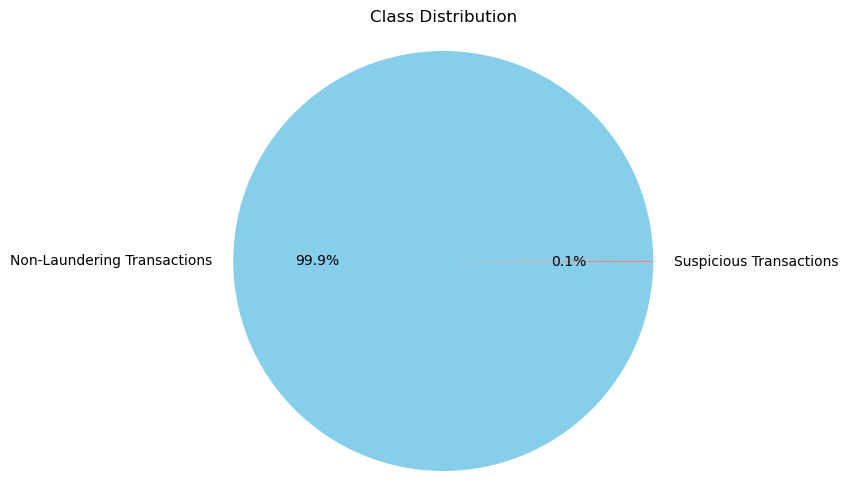

In [16]:
class_distribution = data['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

In [17]:
# Check the initial class distribution
print("Initial class distribution:")
print(data['Is_laundering'].value_counts(normalize=True))

Initial class distribution:
0    0.999025
1    0.000975
Name: Is_laundering, dtype: float64


In [18]:
# Separate the features and the target
X = data.drop(columns=['Is_laundering']) 
y = data['Is_laundering'] #target

In [19]:
# Convert time and date columns to datetime objects
X['Time'] = pd.to_datetime(X['Time'], format='%H:%M:%S')
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')

In [20]:
# Extract features from date if needed, here extracting year, month, day
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

In [21]:
# Extract features from date if needed, here extracting year, month, day
X['Hour'] = X['Time'].dt.hour
X['Minute'] = X['Time'].dt.minute
X['Second'] = X['Time'].dt.second

In [22]:
# Drop the original Date and Time columns
X = X.drop(columns=['Date', 'Time'])

In [23]:
# Identify categorical columns for one-hot encoding
categorical_columns = [
    'Payment_currency', 
    'Received_currency', 
    'Sender_bank_location', 
    'Receiver_bank_location', 
    'Payment_type', 
    'Laundering_type'
]
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns)

In [24]:
# Define the SMOTE model with the desired sampling strategy to balance data
#Is_landuring should have around 30% 1's
smote = SMOTE(sampling_strategy=0.3, random_state=42)

In [25]:
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [26]:
data = pd.DataFrame(X_resampled, columns=X.columns)
data['Is_laundering'] = y_resampled

C:\Users\Arabtech\AppData\Local\Temp\ipykernel_17612\446171337.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Is_laundering'] = y_resampled


In [27]:
# Check the new class distribution
print("New class distribution:")
print(data['Is_laundering'].value_counts(normalize=True))

New class distribution:
0    0.769232
1    0.230768
Name: Is_laundering, dtype: float64


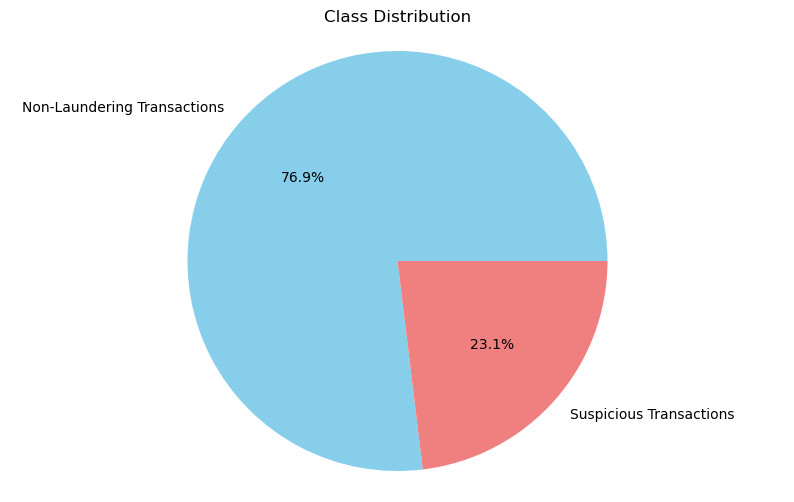

In [28]:
class_distribution = data['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

In [29]:
print("\nData types:")
print(data.dtypes)


Data types:
Sender_account                         int64
Receiver_account                       int64
Amount                               float64
Year                                   int64
Month                                  int64
                                      ...   
Laundering_type_Single_large           uint8
Laundering_type_Smurfing               uint8
Laundering_type_Stacked Bipartite      uint8
Laundering_type_Structuring            uint8
Is_laundering                          int64
Length: 106, dtype: object


In [30]:
data.head()

,Sender_account,Receiver_account,Amount,Year,Month,Day,Hour,Minute,Second,Payment_currency_Albanian lek,...,Laundering_type_Normal_Periodical,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring,Is_laundering
0,4248061080,9527052910,13480.74,2023,8,14,2,8,46,0,...,0,1,0,0,0,0,0,0,0,0
1,9130896737,908371799,10480.05,2023,7,2,19,48,23,0,...,0,0,0,0,0,0,0,0,0,0
2,1466348255,8545558838,26232.35,2023,7,22,12,4,24,0,...,0,0,0,0,0,0,0,0,0,0
3,2181923623,6234034932,447.07,2022,10,28,17,8,2,0,...,0,0,1,0,0,0,0,0,0,0
4,8596132461,3638213339,1005.62,2023,2,21,22,44,17,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#creating high_risk_countries column
# List of high-risk countries
high_risk_countries = {"Nigeria", "Morocco", "Turkey", "Pakistan", "Mexico", "Spain"}
# Identify one-hot encoded columns for high-risk countries
sender_columns = [f"Sender_bank_location_{country}" for country in high_risk_countries]
receiver_columns = [f"Receiver_bank_location_{country}" for country in high_risk_countries]

In [32]:
# Check if any of the sender or receiver columns indicate a high-risk country
data['high_risk_countries'] = data[sender_columns + receiver_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [33]:
data.head()

,Sender_account,Receiver_account,Amount,Year,Month,Day,Hour,Minute,Second,Payment_currency_Albanian lek,...,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring,Is_laundering,high_risk_countries
0,4248061080,9527052910,13480.74,2023,8,14,2,8,46,0,...,1,0,0,0,0,0,0,0,0,0
1,9130896737,908371799,10480.05,2023,7,2,19,48,23,0,...,0,0,0,0,0,0,0,0,0,0
2,1466348255,8545558838,26232.35,2023,7,22,12,4,24,0,...,0,0,0,0,0,0,0,0,0,0
3,2181923623,6234034932,447.07,2022,10,28,17,8,2,0,...,0,1,0,0,0,0,0,0,0,0
4,8596132461,3638213339,1005.62,2023,2,21,22,44,17,0,...,0,1,0,0,0,0,0,0,0,0


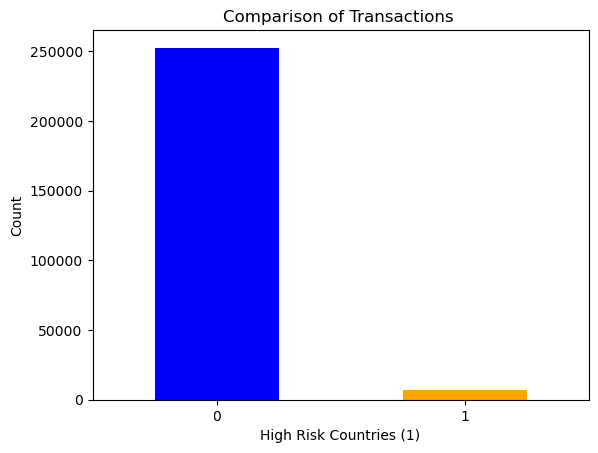

In [34]:
counts = data['high_risk_countries'].value_counts()

# Plotting the counts
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('High Risk Countries (1)')
plt.ylabel('Count')
plt.title('Comparison of Transactions ')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()

In [35]:
# Alternatively, convert specific 'bool' dtype columns
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [36]:
data.head()

,Sender_account,Receiver_account,Amount,Year,Month,Day,Hour,Minute,Second,Payment_currency_Albanian lek,...,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring,Is_laundering,high_risk_countries
0,4248061080,9527052910,13480.74,2023,8,14,2,8,46,0,...,1,0,0,0,0,0,0,0,0,0
1,9130896737,908371799,10480.05,2023,7,2,19,48,23,0,...,0,0,0,0,0,0,0,0,0,0
2,1466348255,8545558838,26232.35,2023,7,22,12,4,24,0,...,0,0,0,0,0,0,0,0,0,0
3,2181923623,6234034932,447.07,2022,10,28,17,8,2,0,...,0,1,0,0,0,0,0,0,0,0
4,8596132461,3638213339,1005.62,2023,2,21,22,44,17,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
data.columns

Index(['Sender_account', 'Receiver_account', 'Amount', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Second', 'Payment_currency_Albanian lek',
       ...
       'Laundering_type_Normal_Plus_Mutual',
       'Laundering_type_Normal_Small_Fan_Out',
       'Laundering_type_Normal_single_large', 'Laundering_type_Scatter-Gather',
       'Laundering_type_Single_large', 'Laundering_type_Smurfing',
       'Laundering_type_Stacked Bipartite', 'Laundering_type_Structuring',
       'Is_laundering', 'high_risk_countries'],
      dtype='object', length=107)

# Random Forest Classifier

In [38]:
#splitting dataset into features(x) and  target(y) 
X = data[['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']]
y = data['Is_laundering']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
predictions = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.988065294389405


In [44]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59862
           1       0.97      0.98      0.97     18062

    accuracy                           0.99     77924
   macro avg       0.98      0.99      0.98     77924
weighted avg       0.99      0.99      0.99     77924



# 
- Training Error

In [45]:
y_train_pred = model.predict(X_train)
train_error = 1 - accuracy_score(y_train, y_train_pred)  # For classification (error = 1 - accuracy)

# Step 6: Print the training error
print(f"Training Error: {train_error:.4f}")

Training Error: 0.0004


#
- Testing Error

In [46]:
y_test_pred = model.predict(X_test)

# Step 5: Calculate the testing error
test_error = 1 - accuracy_score(y_test, y_test_pred)  # For classification (error = 1 - accuracy)

# Step 6: Print the testing error
print(f"Testing Error: {test_error:.4f}")

Testing Error: 0.0119


In [48]:
import random
from faker import Faker
from datetime import datetime, timedelta
import time
import json

# Initialize the Faker instance
fake = Faker()

# Function to generate a single fake data record
def generate_fake_data():
    """
    Generate a single fake transaction record with Day, Month, Year, Hour, Minute, Second, and Is_laundering.
    """
    start_date = datetime(2022, 1, 1)  # Start date for random timestamp
    random_timestamp = start_date + timedelta(seconds=random.randint(0, 31536000))  # Random date within 1 year

    record = {
        "Day": random_timestamp.day,
        "Month": random_timestamp.month,
        "Year": random_timestamp.year,
        "Hour": random_timestamp.hour,
        "Minute": random_timestamp.minute,
        "Second": random_timestamp.second,
        "Is_laundering": random.choice([0, 1])  # Random laundering flag: 0 (Normal), 1 (Suspicious)
    }
    return record

# Function to continuously stream data
def stream_fake_data(stream_interval=1):
    """
    Continuously stream fake transaction data at regular intervals.
    :param stream_interval: Interval in seconds between each data generation.
    """
    print("Starting fake data stream. Press Ctrl+C to stop...\n")
    try:
        while True:
            record = generate_fake_data()
            print(json.dumps(record, indent=4))  # Stream the data as JSON
            time.sleep(stream_interval)  # Wait for the specified interval
    except KeyboardInterrupt:
        print("\nStreaming stopped.")

# Run the streaming function
if __name__ == "__main__":
    stream_fake_data(stream_interval=1)  # Set interval to 1 second


Starting fake data stream. Press Ctrl+C to stop...

{
    "Day": 12,
    "Month": 7,
    "Year": 2022,
    "Hour": 12,
    "Minute": 2,
    "Second": 36,
    "Is_laundering": 0
}
{
    "Day": 9,
    "Month": 8,
    "Year": 2022,
    "Hour": 0,
    "Minute": 1,
    "Second": 27,
    "Is_laundering": 0
}
{
    "Day": 11,
    "Month": 1,
    "Year": 2022,
    "Hour": 13,
    "Minute": 18,
    "Second": 33,
    "Is_laundering": 0
}
{
    "Day": 26,
    "Month": 4,
    "Year": 2022,
    "Hour": 9,
    "Minute": 3,
    "Second": 23,
    "Is_laundering": 1
}
{
    "Day": 13,
    "Month": 11,
    "Year": 2022,
    "Hour": 2,
    "Minute": 15,
    "Second": 12,
    "Is_laundering": 1
}
{
    "Day": 7,
    "Month": 10,
    "Year": 2022,
    "Hour": 3,
    "Minute": 33,
    "Second": 31,
    "Is_laundering": 0
}
{
    "Day": 23,
    "Month": 12,
    "Year": 2022,
    "Hour": 14,
    "Minute": 33,
    "Second": 50,
    "Is_laundering": 1
}
{
    "Day": 1,
    "Month": 5,
    "Year": 2022,
    "Hou

In [49]:
from confluent_kafka import Producer
import json
import time

# Configure the producer
producer_config = {
    'bootstrap.servers': '192.168.1.5:9092'  #  Kafka broker IP and port
}

# Create the producer instance
producer = Producer(producer_config)

# Serialization function
def json_serializer(data):
    return json.dumps(data).encode("utf-8")


# Main loop to send messages to Kafka

if __name__ == "__main__":
    while True:
        # Generate user data
        My_Users = generate_fake_data()
        print(My_Users)

        # Serialize data and send it to Kafka
        serialized_data = json_serializer(My_Users)
        producer.produce("moneylaundery4", value=serialized_data)
        
        time.sleep(2)    

{'Day': 23, 'Month': 3, 'Year': 2022, 'Hour': 1, 'Minute': 26, 'Second': 46, 'Is_laundering': 1}
{'Day': 26, 'Month': 5, 'Year': 2022, 'Hour': 1, 'Minute': 15, 'Second': 35, 'Is_laundering': 1}
{'Day': 18, 'Month': 10, 'Year': 2022, 'Hour': 0, 'Minute': 37, 'Second': 42, 'Is_laundering': 1}
{'Day': 10, 'Month': 4, 'Year': 2022, 'Hour': 12, 'Minute': 16, 'Second': 4, 'Is_laundering': 1}
{'Day': 11, 'Month': 8, 'Year': 2022, 'Hour': 9, 'Minute': 41, 'Second': 5, 'Is_laundering': 1}
{'Day': 18, 'Month': 5, 'Year': 2022, 'Hour': 10, 'Minute': 48, 'Second': 28, 'Is_laundering': 1}
{'Day': 1, 'Month': 10, 'Year': 2022, 'Hour': 0, 'Minute': 25, 'Second': 34, 'Is_laundering': 1}
{'Day': 16, 'Month': 1, 'Year': 2022, 'Hour': 7, 'Minute': 6, 'Second': 51, 'Is_laundering': 0}
{'Day': 1, 'Month': 11, 'Year': 2022, 'Hour': 3, 'Minute': 8, 'Second': 4, 'Is_laundering': 0}
{'Day': 3, 'Month': 5, 'Year': 2022, 'Hour': 10, 'Minute': 23, 'Second': 35, 'Is_laundering': 0}
{'Day': 10, 'Month': 11, 'Year':

KeyboardInterrupt: 

In [50]:
import pickle

# Train and save your model (if not already done)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # X_train, y_train are your training data

# Save the trained model to a pickle file
with open('streamdata.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from confluent_kafka import Consumer
import json
import pickle
import pandas as pd

# Load the pre-trained model (assuming you saved it as a pickle file)
with open(r'C:\Users\Arabtech\Downloads\pkl\streamdata.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the topic and consumer group
topic = 'moneylaundery4'  # Name of the Kafka topic to consume messages from
consumer_group = 'Myconsumer'  # Name of the consumer group

# Configure the Kafka consumer with necessary parameters
conf = {
    'bootstrap.servers': 'localhost:9092',  # Address of the Kafka broker
    'group.id': consumer_group,  # Identifier for the consumer group
    'auto.offset.reset': 'earliest',  # Start consuming messages from the beginning of the topic
}

# Create an instance of the Kafka consumer
consumer = Consumer(conf)

# Subscribe to the specified Kafka topic
consumer.subscribe([topic])

# Define the feature columns used for prediction
feature_columns = ['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']

# Begin consuming messages from the Kafka topic
print(f"Consumer Group '{consumer_group}' is now active and consuming messages from topic '{topic}'...")

while True:
    # Poll the Kafka topic for a message, waiting up to 1 second
    msg = consumer.poll(timeout=1.0)

    # Skip to the next iteration if no message is received within the timeout period
    if msg is None:
        continue

    # Decode and process the received message (assuming JSON format)
    try:
        message_value = json.loads(msg.value().decode('utf-8'))
        print(f"Received message: {message_value}")
        
        # Convert the received message to a DataFrame
        data_df = pd.DataFrame([message_value])
        
        # Ensure the message contains all required features
        if all(col in data_df.columns for col in feature_columns):
            X_new = data_df[feature_columns]
            
            # Predict using the pre-trained model
            prediction = model.predict(X_new)
            
            # Print the prediction
            print(f"Predicted 'Is_laundering': {prediction[0]}")
        else:
            print("Error: Incoming data does not contain the required feature columns.")
    except Exception as e:
        print(f"Error processing message: {e}")


Consumer Group 'Myconsumer' is now active and consuming messages from topic 'moneylaundery4'...
Received message: {'Day': 23, 'Month': 3, 'Year': 2022, 'Hour': 1, 'Minute': 26, 'Second': 46, 'Is_laundering': 1}
Predicted 'Is_laundering': 1
Received message: {'Day': 26, 'Month': 5, 'Year': 2022, 'Hour': 1, 'Minute': 15, 'Second': 35, 'Is_laundering': 1}
Predicted 'Is_laundering': 1
Received message: {'Day': 18, 'Month': 10, 'Year': 2022, 'Hour': 0, 'Minute': 37, 'Second': 42, 'Is_laundering': 1}
Predicted 'Is_laundering': 0
Received message: {'Day': 10, 'Month': 4, 'Year': 2022, 'Hour': 12, 'Minute': 16, 'Second': 4, 'Is_laundering': 1}
Predicted 'Is_laundering': 1
Received message: {'Day': 11, 'Month': 8, 'Year': 2022, 'Hour': 9, 'Minute': 41, 'Second': 5, 'Is_laundering': 1}
Predicted 'Is_laundering': 1
Received message: {'Day': 18, 'Month': 5, 'Year': 2022, 'Hour': 10, 'Minute': 48, 'Second': 28, 'Is_laundering': 1}
Predicted 'Is_laundering': 1
Received message: {'Day': 1, 'Month': 1